In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Read in data 
df = pd.read_csv('countries.csv')

In [7]:
df.head(5)

,Country,Country Groups,BX.KLT.DINV.WD.GD.ZS,EG.ELC.ACCS.ZS,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,FP.CPI.TOTL.ZG,IT.CEL.SETS.P2,IT.NET.USER.ZS,NE.EXP.GNFS.ZS,...,NY.GDP.PCAP.CD,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.IMRT.IN,SP.DYN.LE00.IN,SP.DYN.TFRT.IN,SP.POP.GROW,SP.URB.TOTL.IN.ZS
0,CEB,Central Europe and the Baltics,1.555790,100.000000,14.538355,6.820042,1.840965,122.192106,58.599297,52.333390,...,12567.128310,77.039930,189.578062,10.543330,11.429917,6.019183,75.295349,1.465325,-0.362710,62.059417
1,CSS,Caribbean small states,4.658176,93.114511,9.096342,9.277109,3.250344,113.628492,35.407690,44.935642,...,8726.326154,121.928584,200.568068,17.555646,7.436407,18.406085,72.252392,2.151960,0.642147,42.083135
2,EAP,East Asia & Pacific (excluding high income),3.796483,94.997330,16.471817,5.106045,3.789836,69.905604,28.957482,30.572597,...,4007.323783,91.717833,134.835195,14.439063,7.019396,19.100000,73.482345,1.843869,0.713160,47.696831
3,EAR,Early-demographic dividend,2.073571,79.455104,26.481427,2.119827,4.580200,68.069446,12.835425,27.711023,...,2926.483907,150.595639,214.978616,22.914627,7.028941,40.042149,67.955732,2.763140,1.534541,42.113134
4,EAS,East Asia & Pacific,2.930966,95.496185,13.729447,5.701783,3.247588,73.657018,34.269800,32.153225,...,7674.475705,86.702958,130.465277,13.880915,7.095146,18.136433,74.383915,1.797065,0.675231,51.791229


In [8]:
df.columns

Index(['Country', 'Country Groups', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.ACCS.ZS',
       'EG.FEC.RNEW.ZS', 'EN.ATM.CO2E.PC', 'FP.CPI.TOTL.ZG', 'IT.CEL.SETS.P2',
       'IT.NET.USER.ZS', 'NE.EXP.GNFS.ZS', 'NE.IMP.GNFS.ZS', 'NY.GDP.PCAP.CD',
       'SP.DYN.AMRT.FE', 'SP.DYN.AMRT.MA', 'SP.DYN.CBRT.IN', 'SP.DYN.CDRT.IN',
       'SP.DYN.IMRT.IN', 'SP.DYN.LE00.IN', 'SP.DYN.TFRT.IN', 'SP.POP.GROW',
       'SP.URB.TOTL.IN.ZS'],
      dtype='object')

In [11]:
# Extract the column for visualization
access = df['EG.ELC.ACCS.ZS']

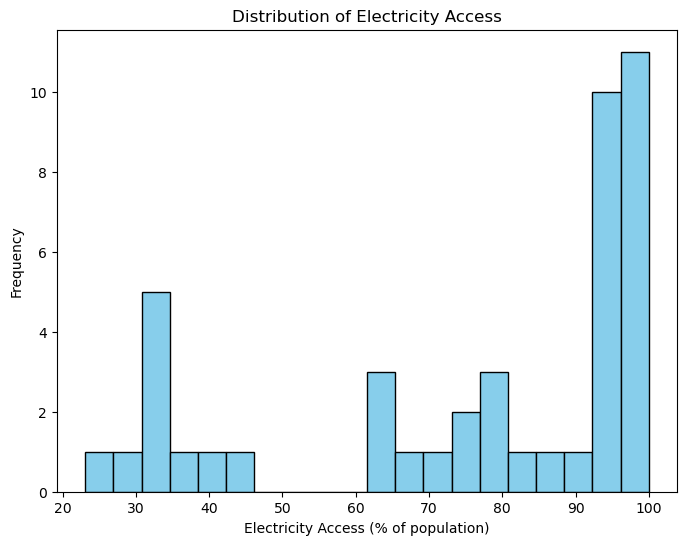

In [13]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(access, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Electricity Access')
plt.xlabel('Electricity Access (% of population)')
plt.ylabel('Frequency')

plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

Standardisation is preferred for its robustness to outliers, preservation of distribution shape, and suitability for algorithms relying on distances or gradients. Its interpretability and applicability to diverse data types make it versatile, aligning with the needs of statistical analyses and machine learning algorithms for improved stability and performance across various scenarios.

In [21]:
# Reshape the 1D array to 2D
access_2d = access.values.reshape(-1, 1)

# Fit and transform the data
access_scaled = scaler.fit_transform(access_2d)

# Create a new DataFrame with the scaled values
df_scaled = pd.DataFrame(access_scaled, columns=['EG.ELC.ACCS.ZS_scaled'])


In [22]:
# Display the first few rows of the scaled DataFrame
print(df_scaled.head())

   EG.ELC.ACCS.ZS_scaled
0               0.909406
1               0.641509
2               0.714765
3               0.110058
4               0.734174


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Create DataFrames for the original and scaled data
df_original = pd.DataFrame({'EG.ELC.ACCS.ZS': access.squeeze()})
df_scaled = pd.DataFrame({'EG.ELC.ACCS.ZS_scaled': access_scaled.squeeze()})


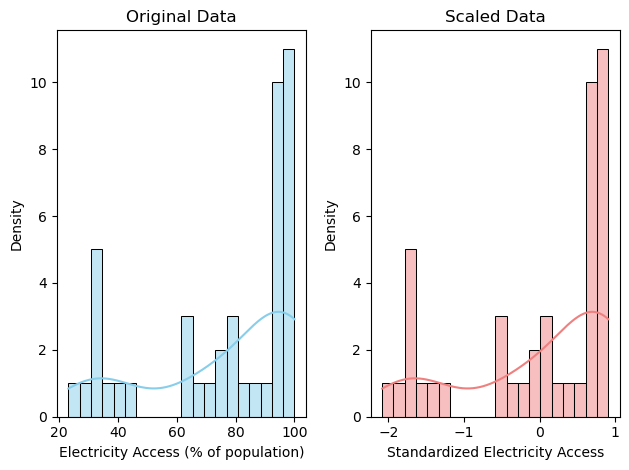

In [25]:
# Plot the original data
plt.subplot(1, 2, 1)
sns.histplot(df_original['EG.ELC.ACCS.ZS'], bins=20, color='skyblue', kde=True)
plt.title('Original Data')
plt.xlabel('Electricity Access (% of population)')
plt.ylabel('Density')

# Plot the scaled data
plt.subplot(1, 2, 2)
sns.histplot(df_scaled['EG.ELC.ACCS.ZS_scaled'], bins=20, color='lightcoral', kde=True)
plt.title('Scaled Data')
plt.xlabel('Standardized Electricity Access')
plt.ylabel('Density')

plt.tight_layout()
plt.show()